In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
from src.data_preprocessing.data_loader import DataLoader
from src.backtesting.backtest import Backtester
from src.utils.visualization import plot_backtesting_result, plot_profit_distribution, plot_cumulative_returns, plot_drawdown, plot_monthly_returns





# Volatillik analizi



In [5]:
data_loader = DataLoader('BTCUSDT', '1m', 5000)
data = data_loader.load_historical_data()

In [6]:
backtester = Backtester('BTCUSDT', '1h', 5000)
param_grid = {
    'macd_fast': [12, 26],
    'macd_slow': [26, 52],
    'macd_signal': [9, 18],
    'rsi_period': [14, 28],
    'vol_imbalance_period': [14, 28],
    'bb_period': [20, 40],
    'bb_std': [2, 2.5],
    'atr_period': [14, 28],
    'trend_period': [50, 100],
    'entry_threshold': [0.6, 0.7],
    'stop_loss_multiplier': [1.5, 2.0],
    'take_profit_multiplier': [2.0, 2.5]
}

In [7]:
best_params, best_performance = backtester.optimize_parameters(param_grid)
print("Ən yaxşı parametrlər:", best_params)
print("Ən yaxşı performans:", best_performance)

Calculated correlations: {'macd': 0.48120258838587315, 'rsi': 0.39650094477486936, 'volume_imbalance': 0.15148335364042503}
Correlations: {'macd': 0.48120258838587315, 'rsi': 0.39650094477486936, 'volume_imbalance': 0.15148335364042503}
Empirical values: {'macd': (-246.68563752626872, 191.55457459770108), 'rsi': (40.05428456162594, 57.725738613490485), 'volume_imbalance': (-0.2520827026581449, 0.22957669879244053)}
Setir emal edilir: open                66364.690000
high                66364.690000
low                 66100.000000
close               66169.990000
volume                747.096290
buy_volume              0.000000
sell_volume           747.096290
volume_imbalance        0.070228
macd                  316.577306
signal                309.501741
rsi                    66.660779
upper_band          66767.132346
middle_band         65836.461333
lower_band          64905.790320
atr                   352.875714
trend                  -1.000000
Name: 2024-05-16 10:00:00+00:00, d

In [15]:
result = backtester.backtest(best_params)

NameError: name 'best_params' is not defined

In [ ]:
plot_backtesting_result(result)
plot_profit_distribution(result)
plot_cumulative_returns(result)
plot_drawdown(result)
plot_monthly_returns(result)


NameError: name 'macd' is not defined

In [7]:
bull_market = result[result['close'].pct_change().rolling(30).mean() > 0]
bear_market = result[result['close'].pct_change().rolling(30).mean() <= 0]


NameError: name 'macd_bottom' is not defined

In [8]:
print("Yüksələn bazarda performans:")
print(backtester.calculate_performance(bull_market))


NameError: name 'macd' is not defined

In [9]:
print("Enən bazarda performans:")
print(backtester.calculate_performance(bear_market))

NameError: name 'macd_correlation' is not defined

NameError: name 'data' is not defined

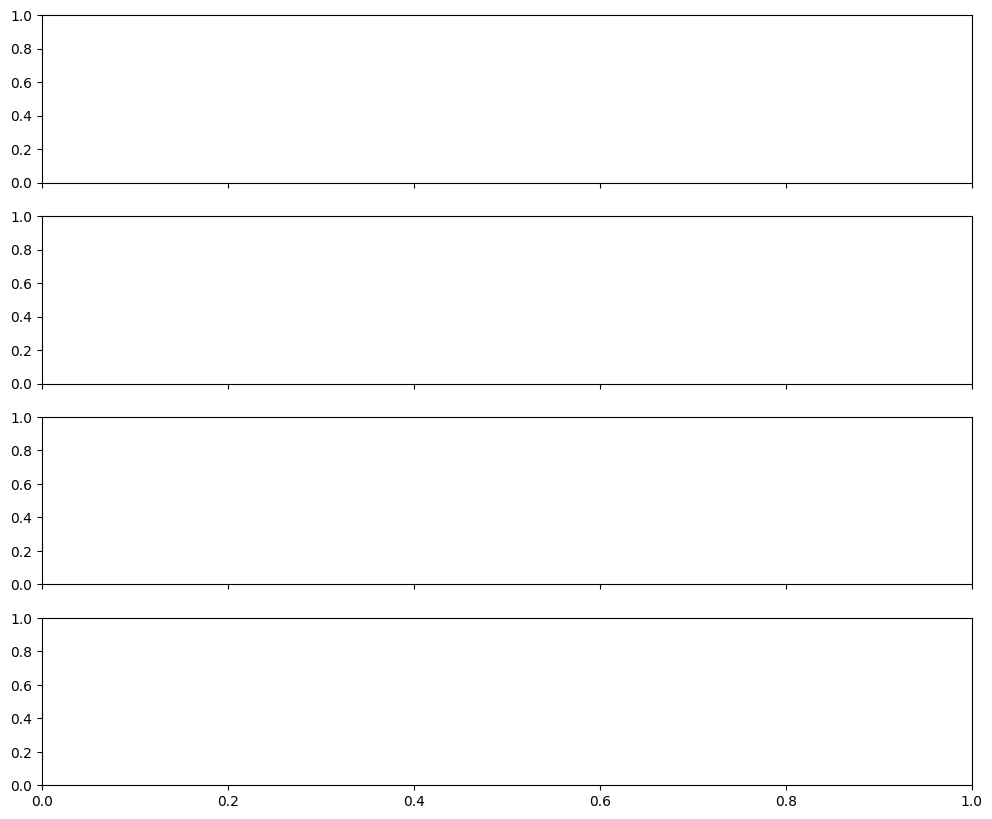

In [10]:
result['volatility'] = result['close'].pct_change().rolling(30).std() * np.sqrt(365)
high_volatility = result[result['volatility'] > result['volatility'].median()]
low_volatility = result[result['volatility'] <= result['volatility'].median()]


In [ ]:
print("Yüksək volatillikdə performans:")
print(backtester.calculate_performance(high_volatility))



In [ ]:
print("Aşağı volatillikdə performans:")
print(backtester.calculate_performance(low_volatility))